In [1]:
#Importing housing data for simple linear regression analysis
#MEDV (median value of home in 1000s) as the target or dependent variable
# the other are 13 predictive variables (independent)

import pandas as pd
df = pd.read_csv('housing.data.txt', header = None,
                sep = '\s+')

In [2]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
             'NOX', 'RM', 'AGE', 'DIS', 'RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


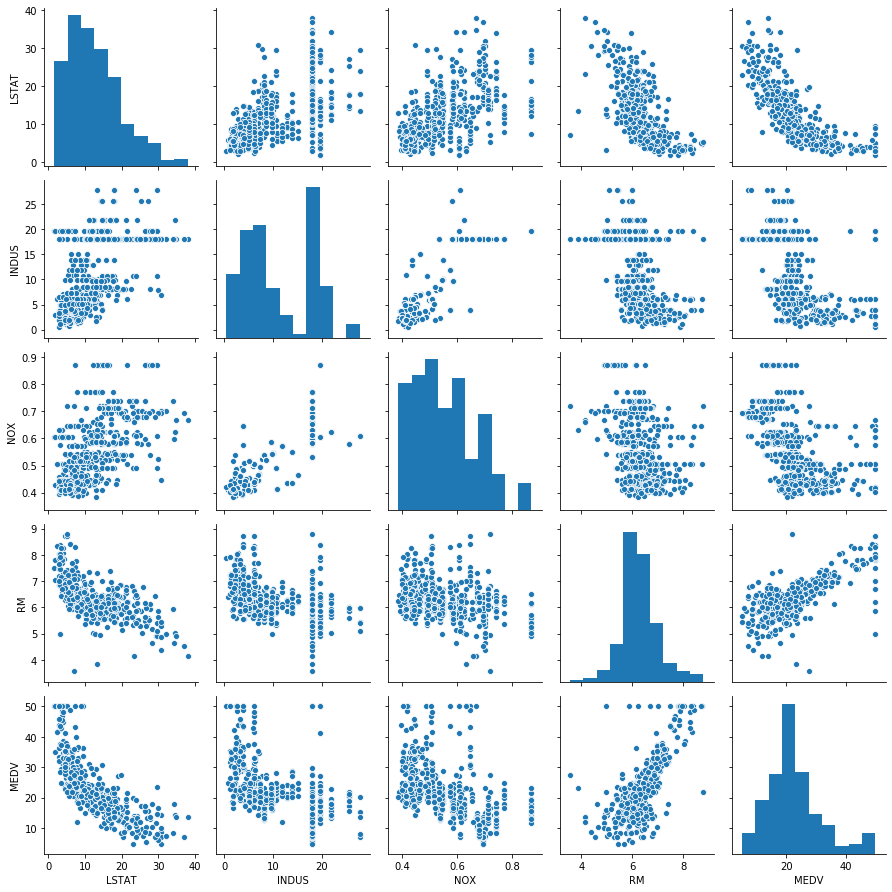

In [3]:
#Exploratory data analysis
#Scatterplot Matrix:

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height = 2.5)
plt.tight_layout()
plt.show()

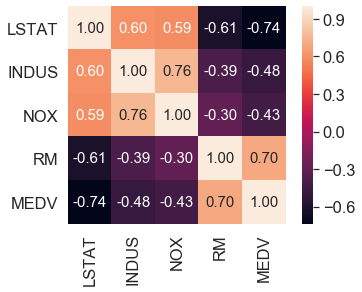

In [6]:
#Correlation Matrix - Linear relationships between variables

import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)

hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)

plt.show()

In [4]:
#Ordinary least squares (OLS) - minimizes the sum of squared errors
#Using gradient descent to train parameters

class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_= np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)
            

In [7]:
#Fitting a LM using RM to predict MEDV
#Standardize the variables for better convergence

X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
#The above is a workaround because transform is expecting a 
# 2-d array and y is 1-d - then flatten returns to the normal 1-d after standardization

lr = LinearRegressionGD()

lr.fit(X_std, y_std)

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Use

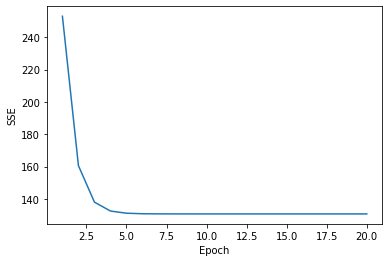

In [8]:
#Plot to make sure that there is convergence to a cost minimum
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)

plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

#Convergence after the 5th epoch

In [9]:
#Visualizing how well the linear regression line fits the data
#helper function to plot a scatterplot of the training samples and add a regression line

def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', 
               edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black',
            lw = 2)
    return None


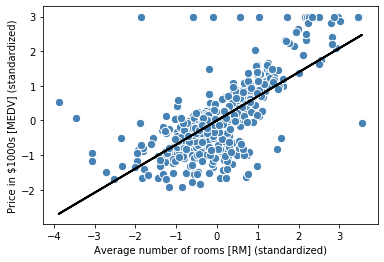

In [9]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [10]:
# see predicted outcome on the original scale
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print('Price in $1000s: %.3f' % \
     sc_y.inverse_transform(price_std))

#House with 5 bedrooms is predicted to cost $10,840

Price in $1000s: 10.840


In [10]:
#Estimating coefficients of a regression model using scikit-learn
# liblinear package works better on unstandardized data

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

print('Slope: %.3f' %slr.coef_[0])
print('Intercept: %.3f' %slr.intercept_)

#These numbers are different than with our previous model
# with standardized variables

Slope: 9.102
Intercept: -34.671


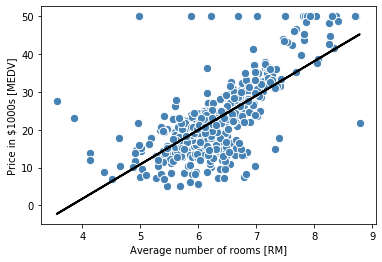

In [12]:
#Plotting the new model
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

#The below plot is identical to the one we made with
# the standardized variables

In [11]:
#To deal with outliers: Random Sample Consensus (RANSAC)
# fits a regression model on a subset of samples - 'inliers'

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

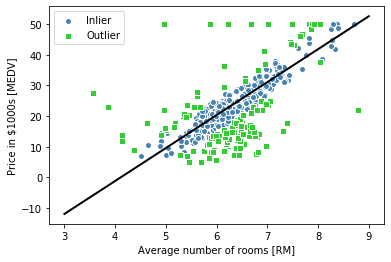

In [12]:
#After we have fitted the RANSAC model - we can plot the inliers and the outliers

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
           c = 'steelblue', edgecolor = 'white',
           marker = 'o', label = 'Inlier')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c = 'limegreen', edgecolor = 'white',
           marker = 's', label = 'Outlier')
plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
print('Slope: %.3f' %ransac.estimator_.coef_[0])
print('Intercept: %.3f' %ransac.estimator_.intercept_)
#This number is slightly different than the results we got
#from the previous model - reducing the potential effects of outliers

Slope: 10.735
Intercept: -44.089


In [13]:
#Evaluating the performance of regression models
#Training a multiple regression model and testing its fit

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size =0.3, random_state =0)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

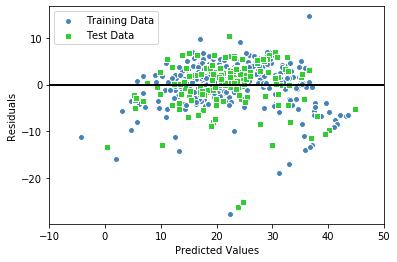

In [14]:
#Using residual plots to diagnose the regression model

plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'steelblue', marker = 'o', edgecolor = 'white',
           label = 'Training Data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'limegreen', marker = 's', edgecolor = 'white',
           label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, 
          color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#For a good model - expect the errors are randomly distributed
# and the residuals should be randomly scattered around the centerline.

#If you see patterns - it means that model has been unable to capture
# some explanatory information - this then leaks into the residuals

#residuals plots can also be used to spot outliers

In [15]:
#Mean square error (MSE) - the average value of the SSE Cost 
#useful to compare models or for tuning parameters via grid-search or CV

from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' %(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

#the much larger error for the test set suggest that the model is overfit

MSE train: 19.958, test: 27.196


In [16]:
#Coefficent of determination (R^2 value) - standardized MSE
# Fraction of the response varience captured by the model
# For the training set - it is bound 0-1 but test can be negative

from sklearn.metrics import r2_score

print('R^2 train: %.3f, R^2 test: %.3f' %
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))

#Little more than half (.67) of the variance is explained by the model
# not great but ok

R^2 train: 0.765, R^2 test: 0.673


In [17]:
#Regularization methods for regression
#Ridge regression, Lasso, and Elastic Net - Elastic Net is a compromise between Ridge and Lasso
# Uses both L1 and L2 penalties 

#Ridge Regression - tuning the strength of term
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)

#Elastic net - allows us to vary the L1 to L2 Ratio:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

#If l1_ratio = 1.0 it is Lasso


In [18]:
#Adding polynomial terms to a linear regression model

#Add a second degree polynomial
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
             368.0, 396.0, 446.0, 480.0, 586.0])\
            [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
             342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X)


In [19]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [20]:
#Fit a multiple regression model on the transformed features for polynomial
# regression

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

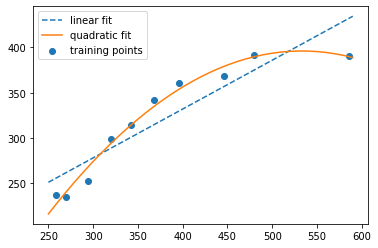

In [21]:
plt.scatter(X, y, label = 'training points')
plt.plot(X_fit, y_lin_fit,
        label = 'linear fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit,
        label = 'quadratic fit')

plt.legend(loc = 'upper left')
plt.show()

#We can see here that the polynomial fits the data better than the linear model
# looks very overfit though

In [22]:
y_lin_pred =lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f' %
     (mean_squared_error(y, y_lin_pred),
     mean_squared_error(y, y_quad_pred)))

#Big decrease in MSE of quadratic

Training MSE linear: 569.780, quadratic: 61.330


In [23]:
print('Training R^2 linear: %.3f, quadratic: %.3f' %
     (r2_score(y, y_lin_pred),
     r2_score(y, y_quad_pred)))

Training R^2 linear: 0.832, quadratic: 0.982


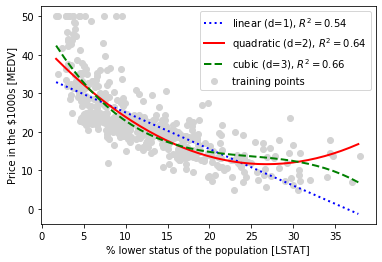

In [24]:
#Training polynomial models for housing data
#Using LSTAT as a 2nd degree (quadratic) and 3rd degree (cubic) polynomials

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

#Creates Quadratic Features

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Fit Features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#Plot the results
plt.scatter(X, y, label = 'training points', color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
        label = 'linear (d=1), $R^2=%.2f$' % linear_r2,
        color = 'blue', lw = 2, linestyle = ':')

plt.plot(X_fit, y_quad_fit,
        label = 'quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
        color = 'red', lw = 2, linestyle = '-')

plt.plot(X_fit, y_cubic_fit,
        label = 'cubic (d=3), $R^2=%.2f$' % cubic_r2,
        color = 'green', lw = 2, linestyle = '--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in the $1000s [MEDV]')

plt.legend(loc = 'upper right')

plt.show()

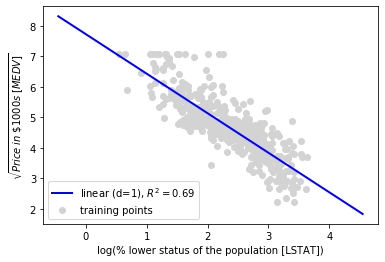

In [25]:
#Can see from the above that the cubic fits best but polynomials are often overfit to the data
# Instead, it may be useful to logtransform the data as the scatterplot suggests an exponential function

#Transform features
X_log = np.log(X) #Log transform the X
y_sqrt = np.sqrt(y) # Squareroot the y - maybe creates a linear relationship

#fit features
X_fit = np.arange(X_log.min()-1,
                 X_log.max()+1, 1)[:,np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)

linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

#Plot the results
plt.scatter(X_log, y_sqrt,
           label = 'training points',
           color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
        label = 'linear (d=1), $R^2=%.2f$' % linear_r2,
         color = 'blue', lw = 2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc = 'lower left')
plt.show()

#Log transformed the X and sqrt the y leads to a linear relationship
# and a R^2 better than any of the other regression models

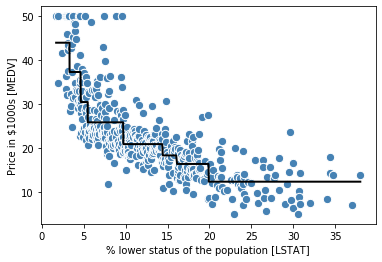

In [26]:
#Using Random Forest to deal with nonlinear regression
#Uses MSE as the information gained criterion or the impurity metric

#Also do not need to tranform since it is a tree

#using decisiontree to model the nonlinear relationship

from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

#Pretty good fit - you have to be careful about the depth
# also, you can notice that it does not capture the continuity of the data
# sharp cut offs

In [27]:
#A better way to do the above is with random forests rather than a tree
#Fitting using all of the data and MSE as the growth criterion

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test =\
            train_test_split(X, y,
                            test_size = 0.4,
                            random_state = 1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                             criterion='mse',
                             random_state=1,
                             n_jobs=-1)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' %(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


#Seems way overfit - mse train to test is huge difference
#Does explain the relationship pretty well (R^2 .87)

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


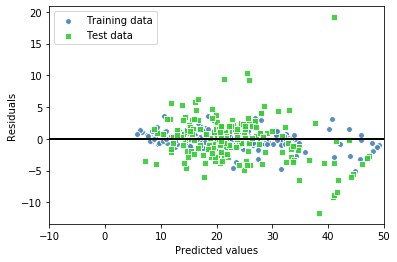

In [28]:
#Looking at the residuals of the prediction

plt.scatter(y_train_pred,
           y_train_pred-y_train,
           c = 'steelblue',
           edgecolor = 'white',
           marker = 'o',
           s = 35,
           alpha = 0.9,
           label = 'Training data')

plt.scatter(y_test_pred,
           y_test_pred - y_test,
           c = 'limegreen',
           edgecolor = 'white',
           marker = 's',
           s = 35,
           alpha = 0.9,
           label= 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'black')
plt.xlim([-10, 50])
plt.show()

#Still has issues in that it does not capture all the variance (scatter not centered
# around the line) - also outliers are having an effect
# better than earlier residual plot however